In [3]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, Input
from tensorflow.keras.models import Sequential

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step 
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


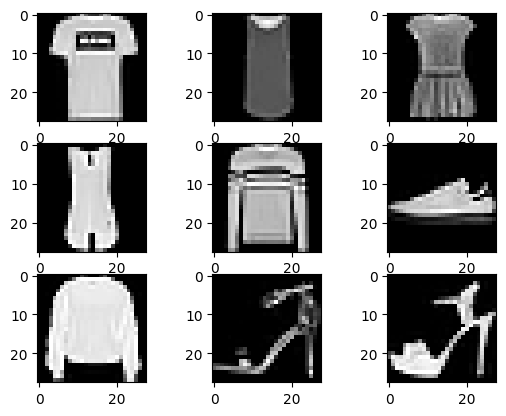

In [10]:
for i in range(1,10):
    plt.subplot(3,3,i)

    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))

plt.show()

In [11]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [16]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [17]:
train_images.shape

(60000, 28, 28, 1)

## Creating the Model

In [19]:
img_height = 28
img_width  = 28
model = Sequential([
    Input(shape=(img_height, img_width, 1)),
    
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

In [23]:
history = model.fit(
    x=train_images.astype(np.float32), 
    y=train_labels.astype(np.int32),
    epochs=30,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.8007 - sparse_categorical_accuracy: 0.7087 - val_loss: 0.4497 - val_sparse_categorical_accuracy: 0.8325
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.4085 - sparse_categorical_accuracy: 0.8495 - val_loss: 0.4049 - val_sparse_categorical_accuracy: 0.8465
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.3436 - sparse_categorical_accuracy: 0.8731 - val_loss: 0.3384 - val_sparse_categorical_accuracy: 0.8785
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.2987 - sparse_categorical_accuracy: 0.8873 - val_loss: 0.3205 - val_sparse_categorical_accuracy: 0.8832
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.2724 - sparse_categorical_accuracy: 0.8990 - val_loss: 0.3249 - val_sparse_categorical_accuracy: 0.8817
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.2393 - sparse_categorical_accuracy: 0.9106 - val_loss: 0.2938 - val_sparse_categorical_acc

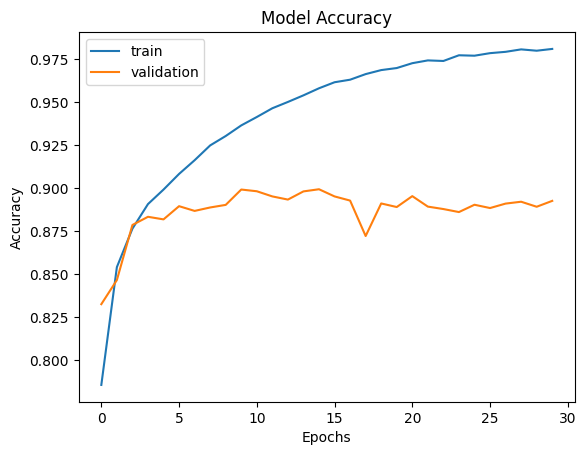

In [39]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'],loc='upper left')
plt.show()

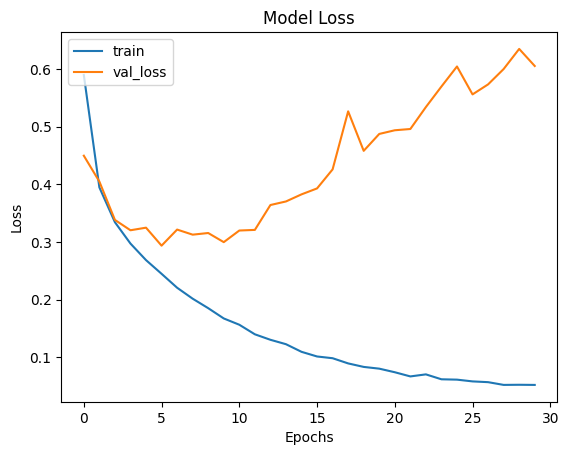

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val_loss'],loc='upper left')
plt.show()

## Testing the images 

In [29]:
test_images.shape

(10000, 28, 28, 1)

In [30]:
test_images[1].shape

(28, 28, 1)

In [35]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


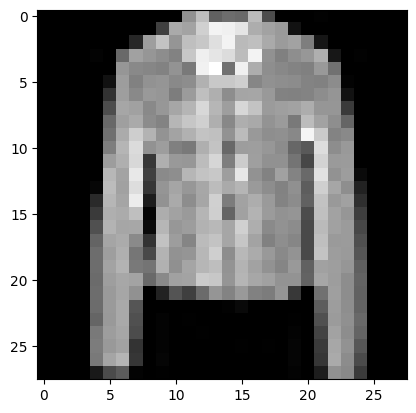

The predicted clothing is Coat


In [37]:
image = test_images[10].reshape(1,28,28,1)
prediction = np.argmax(model.predict(image), axis=1)

plt.imshow(image.reshape(28,28), cmap='gray')
plt.show()

print("The predicted clothing is {}".format(class_names[prediction[0]]))

In [38]:
model.save('fashion_mnist.h5')